In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_vwap(df:pd.DataFrame, kind='majority'):
    if kind != 'majority':
        vwap = sum(df[f'{action}_price_{i}'].fillna(0)*df[f'{action}_volume_{i}'].fillna(0)
                    for action in ['bid', 'ask'] 
                    for i in [1,2,3])/\
                    sum(df[f'{action}_volume_{i}'].fillna(0)
                        for action in ['bid', 'ask'] 
                        for i in [1,2,3])
    else:
        def f(row):
            max_volume_bid_index = np.nanargmax([row[f'bid_volume_{i}'] for i in [1,2,3]])
            max_volume_ask_index = np.nanargmax([row[f'ask_volume_{i}'] for i in [1,2,3]])
            value = (row[f'bid_price_{max_volume_bid_index+1}']*row[f'bid_volume_{max_volume_bid_index+1}'] \
                + row[f'ask_price_{max_volume_ask_index+1}']*row[f'ask_volume_{max_volume_ask_index+1}']) / \
                ((row[f'bid_volume_{max_volume_bid_index+1}'] \
                + row[f'ask_volume_{max_volume_ask_index+1}']))
            return value
        vwap = df.apply(f, axis=1)
    return vwap

In [25]:
history = pd.read_csv('5b122c9f-1088-47c2-ab71-a2974778cd37.csv', sep=';', header=0)
history['vwap'] = get_vwap(history)
history = history.pivot(columns=['product'], values=['mid_price', 'profit_and_loss', 'vwap'], index='timestamp')
history.head(10)

mid_price                  profit_and_loss                   \
product        KELP RAINFOREST_RESIN            KELP RAINFOREST_RESIN   
timestamp                                                               
0            2028.5          10003.0        0.000000              0.0   
100          2026.5          10000.0       -2.157471              0.0   
200          2026.5          10000.0       -2.235840              0.0   
300          2026.5          10000.0       -2.147339              0.0   
400          2026.5          10000.0       -2.307251              0.0   
500          2026.5           9998.5       -2.545898              0.0   
600          2027.0          10002.5       -2.782349              0.0   
700          2026.5          10000.0       -3.140869              0.0   
800          2025.5          10000.0       -3.789917              0.0   
900          2025.5          10000.0       -3.296265              0.0   

                  vwap                   
product           KELP RAINFOREST_RESIN  
timestamp                                
0          2027.066667          10000.0  
100        2026.913043          10000.0  
200        2026.428571          10000.0  
300        2026.933333          10000.0  
400        2026.500000          10000.0  
500        2026.500000          10000.0  
600        2026.339286          10000.0  
700        2026.000000          10000.0  
800        2025.033898          10000.0  
900        2025.500000          10000.0

In [38]:
kelp_pnl = history[('profit_and_loss', 'KELP')]
kelp_mid = history[('mid_price', 'KELP')]
kelp_vwap = history[('vwap', 'KELP')]
kelp_fair = kelp_pnl + 2029
kelp_fair

timestamp
0         2029.000000
100       2026.842529
200       2026.764160
300       2026.852661
400       2026.692749
             ...     
199500    2022.086548
199600    2021.877319
199700    2021.789429
199800    2021.748047
199900    2021.833008
Name: (profit_and_loss, KELP), Length: 2000, dtype: float64

In [313]:
def ema(prices, period):
        if len(prices) < period:
            return None  # Not enough data to compute EMA
        weights = np.exp(np.linspace(-1., 0., period))
        weights /= weights.sum()
        return np.convolve(prices, weights, mode='valid')

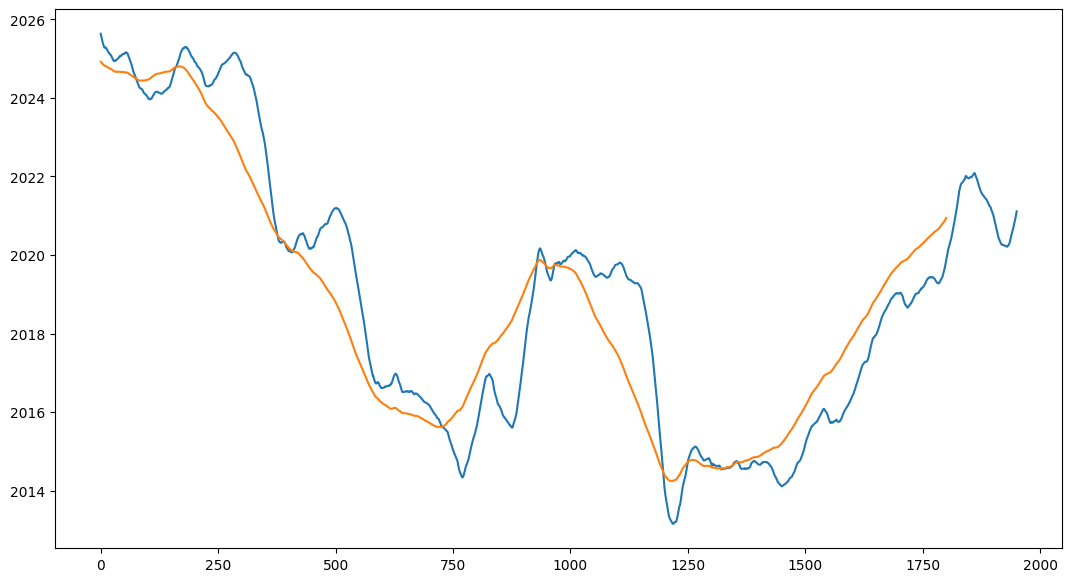

In [314]:
fig, ax = plt.subplots(figsize=(13,7))

ema50 = ema(history[('vwap', 'KELP')], 50)
ema100 = ema(history[('vwap', 'KELP')], 200)
ax.plot(ema50)
ax.plot(ema100)

plt.show()

In [315]:
ema(history[('vwap', 'KELP')][-50:], 50)[-1]

2021.1111069400172

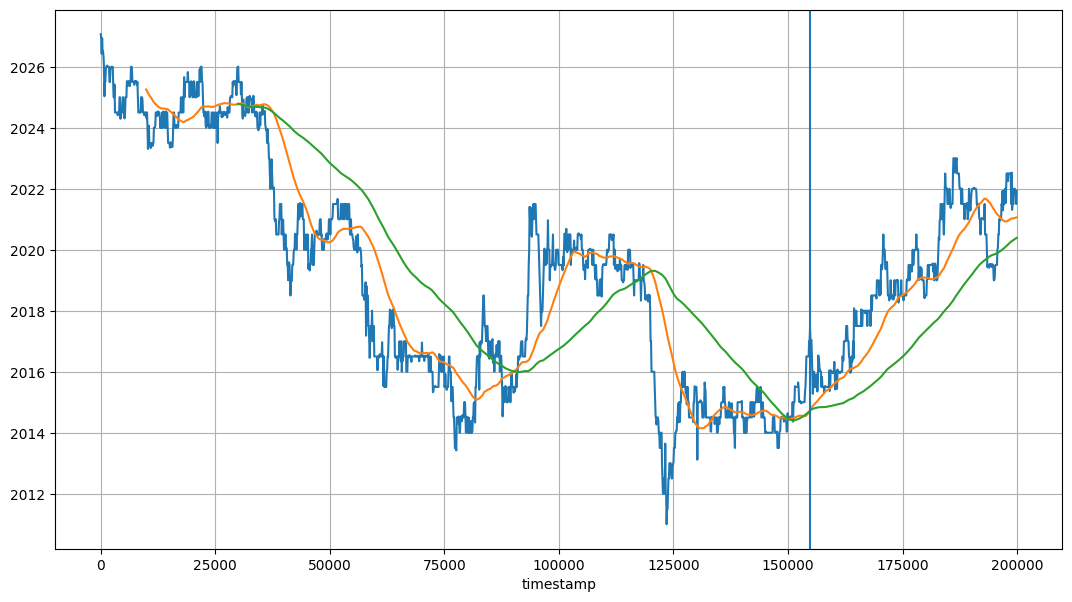

In [316]:
fig, ax = plt.subplots(figsize=(13,7))
history[('vwap','KELP')].plot(ax=ax)
history[('vwap', 'KELP')].rolling(100).mean().plot(ax=ax)
history[('vwap', 'KELP')].rolling(300).mean().plot(ax=ax)

macd_50_100 = history[('vwap', 'KELP')].ewm(50).mean() - history[('vwap', 'KELP')].ewm(100).mean()
ax.axvline(154800)
ax.grid()
plt.show()


In [317]:
a = history[('vwap', 'KELP')].rolling(75).mean()
b = history[('vwap', 'KELP')].rolling(300).mean()

a[(a.shift(-1) < b.shift(-1)) & (a > b)]

timestamp
36900     2024.590912
119300    2019.262693
Name: (vwap, KELP), dtype: float64

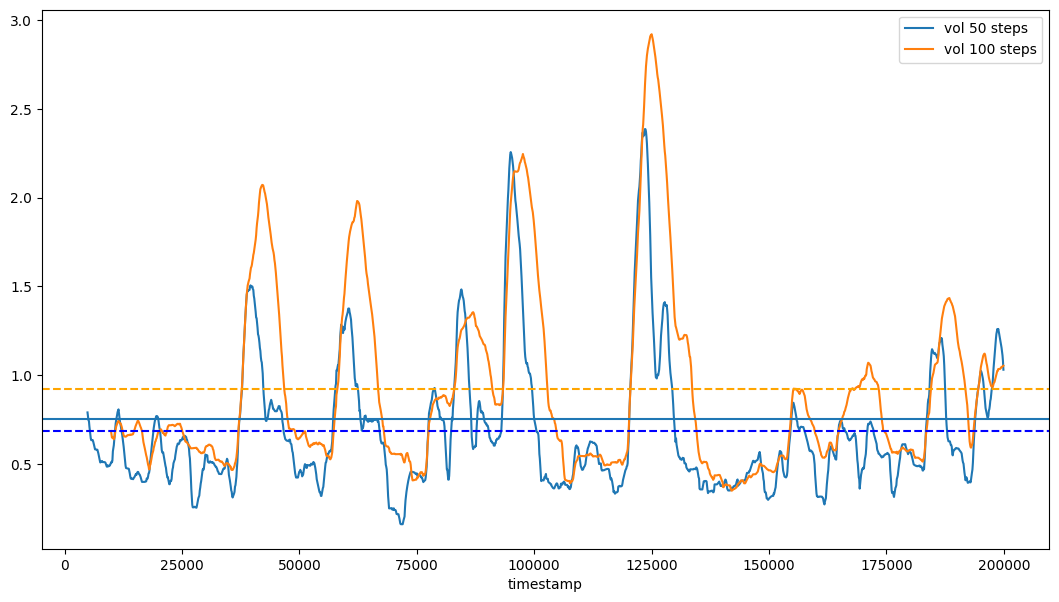

In [306]:
fig, ax = plt.subplots(figsize=(13,7))
history[('vwap', 'KELP')].rolling(50).std().plot(ax=ax)
history[('vwap', 'KELP')].rolling(100).std().plot(ax=ax)
ax.axhline(history[('vwap', 'KELP')].rolling(50).std().mean(), ls='--', c='blue')
ax.axhline(history[('vwap', 'KELP')].rolling(100).std().mean(), ls='--', c='orange')
ax.axhline(0.75)
ax.legend(['vol 50 steps', 'vol 100 steps'])
plt.show()

In [296]:
history[('vwap', 'KELP')][-200:].rolling(100).mean().iloc[-1]

2021.0604161928575

In [294]:
history[('vwap', 'KELP')].rolling(50).std().mean()

0.6842688148675855

In [141]:
macd_50_100[(macd_50_100.shift(-1)>0) & (macd_50_100<0)]

timestamp
19700    -0.001363
29000    -0.005435
93200    -0.007677
154100   -0.007994
Name: (vwap, KELP), dtype: float64

In [ ]:
sell, 34400, 119800
buy, 93200, 154100

0


In [318]:
def get_price_change(series):
    return (series.diff(1)/series)

def resample(series, period):
    return series.resample(period).mean()

In [ ]:
kelp_price = history.xs('KELP', level='product')['mid_price']
rainforest_resin_price = history.xs('RAINFOREST_RESIN', level='product')['mid_price']
kelp_pnl = history.xs('KELP', level='product')['profit_and_loss']
rainforest_resin_pnl = history.xs('RAINFOREST_RESIN', level='product')['profit_and_loss']


In [ ]:
kelp_price.index.total_seconds()

In [ ]:
kelp_price.index = kelp_price.index.total_seconds()


In [ ]:
kelp_price.iloc[-100:].plot()

In [ ]:
kelp_pnl[-500:].plot()

In [ ]:
kelp_pc = get_price_change(kelp_price)
rainforestresin_pc = get_price_change(rainforest_resin_price)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

resampled_kelp  = resample(kelp_price, '1000s')
#resampled_kelp.index = resampled_kelp.index.total_seconds() * 1000
resampled_kelp.plot()
kelp_price.rolling(200).mean().plot()
kelp_price.rolling(100).mean().plot()

plt.xticks(rotation=45)
plt.show()

In [ ]:
%matplotlib inline
resampled_rf_resin  = resample(rainforest_resin_price, '1000s')
resampled_rf_resin.index = resampled_rf_resin.index.total_seconds() * 1000
hist_mean = rainforest_resin_price.mean()
hist_std = rainforest_resin_price.std()
rainforest_resin_price_norm = (rainforest_resin_price - hist_mean)/hist_std
rolling_rf_resin = rainforest_resin_price_norm.rolling(100).mean()
rainforest_resin_price[:20].plot(marker='o')

plt.xticks(rotation=45)
plt.show()

In [ ]:
%matplotlib inline
kelp_data = history.xs('RAINFOREST_RESIN', level='product')
bid_ask = kelp_data['ask_price_1'] - kelp_data['bid_price_1']
bid_ask.plot(kind='hist', bins=50)

In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Compute correlation and p-value
r, p_value = pearsonr(pc_kelp[1:], pc_rf_resin[1:])

print(f"Correlation: {r:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Correlation is statistically significant.")
else:
    print("Correlation is NOT statistically significant.")


In [ ]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as pl
pl.style.use("default") #ggplot is also fine
pl.rcParams["figure.figsize"] = (20,20)


# Load dataset
df = pd.read_csv('4221de97-1b5b-4790-ba48-700bac4cc162.csv', sep=';')

# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('datetime', inplace=True)

# Ensure no NaN values in mid_price
df['mid_price'] = df['mid_price'].ffill()
df.dropna(subset=['mid_price'], inplace=True)

df.drop(['profit_and_loss'], axis=1, inplace=True)

# Backtrader Data Feed
class CustomData(bt.feeds.PandasData):
    params = (
        ('datetime', None),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
    )

    # Mapping backtrader OHLC to mid_price
    lines = ('close',)
    params = (('close', 15),)  # mid_price column index

# Moving Average Cross Strategy
class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast_period', 120),
        ('slow_period', 200),
        ('kelp_limit', 50),
    )

    def __init__(self):
        self.sma_fast = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.fast_period) for data in self.datas if data._name == "KELP"}
        self.sma_slow = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.slow_period) for data in self.datas if data._name == "KELP"}

    def next(self):
        for data in self.datas:
            if data._name != "KELP":
                continue

            position = self.getposition(data).size
            max_position = self.params.kelp_limit

            if self.sma_fast[data][0] > self.sma_slow[data][0]:  # Bullish crossover
                if position < max_position:
                    self.buy(data=data, size=int((max_position-position)))
            elif self.sma_fast[data][0] < self.sma_slow[data][0]:  # Bearish crossover
                if position > -max_position:
                    self.sell(data=data, size=int((position+max_position)))


# Mean Reversion Strategy for RAINFOREST_RESIN
class MeanReversionStrategy(bt.Strategy):
    params = (
        ('lookback', 50),
        ('historical_mean', 10000.05),
        ('historical_std', 1.4813),
        ('entry_threshold', 0.1),
        ('exit_threshold', 0.01),
        ('resin_limit', 50),
    )

    def __init__(self):
        self.mean = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.lookback) for data in self.datas if data._name == "RAINFOREST_RESIN"}
        #self.stddev = {data: bt.indicators.StandardDeviation(data.close, period=self.params.lookback) for data in self.datas if data._name == "RAINFOREST_RESIN"}

    def next(self):
        for data in self.datas:
            if data._name != "RAINFOREST_RESIN":
                continue
            position = self.getposition(data).size
            max_position = self.params.resin_limit
            price = data.close[0]

            if price > 0+1e4:
                self.sell(data=data, size=int((position+max_position)*1))
            elif price < -0+1e4:
                self.buy(data=data, size=int((max_position-position))*1)
            else:
                self.close(data=data)               

            # z_score = (self.mean[data][0] - self.params.historical_mean) / (self.params.historical_std + 1e-8)

            # if z_score > self.params.entry_threshold:  # Price is too high
            #     self.sell(data=data, size=int((position+max_position)*1))
            # elif z_score < -self.params.entry_threshold:  # Price is too low
            #     self.buy(data=data, size=int((max_position-position))*1)
            # elif abs(z_score) < self.params.exit_threshold:  # Mean reversion
            #     if position > 0:
            #         self.sell(data=data, size=position)
            #     elif position < 0:
            #         self.buy(data=data, size=-position)                 

# Initialize Cerebro Engine
cerebro = bt.Cerebro()
cerebro.addstrategy(MovingAverageCrossStrategy)
cerebro.addstrategy(MeanReversionStrategy)

# Add Data to Backtrader
for product in df['product'].unique():
    product_df = df[df['product'] == product].copy()
    product_df['open'] = product_df['mid_price']
    product_df['high'] = product_df['mid_price']
    product_df['low'] = product_df['mid_price']
    product_df['close'] = product_df['mid_price']
    product_df['volume'] = 1  # Placeholder volume
    
    data = CustomData(dataname=product_df, name=product)
    cerebro.adddata(data)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, data=data, _name='timereturns')

cerebro.broker.set_cash(1e6)
cerebro.broker.set_coc(True)

# Run Backtest
cerebro.addanalyzer(bt.analyzers.PyFolio, _name="pyfolio")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name="sharpe")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
results = cerebro.run()

fig = cerebro.plot(width=2000, height=2000, tight=True, dpi=1000, volume=False)[0][0]
fig.savefig('backtest_plot.png')

# Display the saved image
Image(filename='backtest_plot.png')

In [ ]:
strat = results[0]

# Sharpe Ratio
sharpe = strat.analyzers.sharpe.get_analysis()
print(f"Sharpe Ratio: {sharpe.get('sharperatio', 'N/A')}")

# Drawdown
drawdown = strat.analyzers.drawdown.get_analysis()
print(f"Max Drawdown: {drawdown['max']['drawdown']:.2f}%")


In [ ]:
PnL = cerebro.broker.getvalue() - 1e6
print(f'PnL: {PnL}')

#### Analyzing returns for KELP

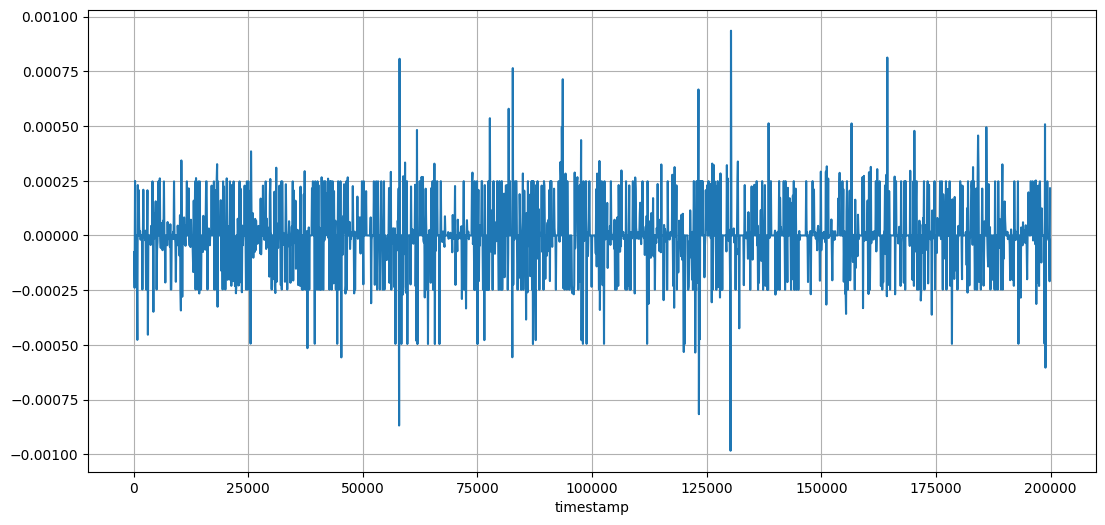

In [382]:
kelp_price = history[('vwap', 'KELP')]
kelp_pc = get_price_change(kelp_price)

fig, ax = plt.subplots(figsize=(13,6))
kelp_pc.plot(ax=ax)
ax.grid()
plt.show()

In [419]:
import statsmodels.api as sm

X = sm.add_constant(kelp_pc[1:-1]).values
y = kelp_pc[2:].values
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     97.09
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.13e-22
Time:                        16:04:43   Log-Likelihood:                 14604.
No. Observations:                1998   AIC:                        -2.920e+04
Df Residuals:                    1996   BIC:                        -2.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.544e-06   3.62e-06     -0.426      0.6

In [386]:
kelp_pc.corr(kelp_pc.shift(-1))

-0.21537345575175382

In [2]:
object_ = ['1', 'a']
def func(object):
    obj = object_
    obj = obj + ['b']
    print(obj)
    print(object_)

func(object_)

['1', 'a', 'b']
['1', 'a']


In [138]:
## Analyzing data bottles

sq_history_day_minus_2 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_-2.csv', sep=';', header=0)
sq_history_day_minus_2['vwap'] = get_vwap(sq_history_day_minus_2)
sq_history_day_minus_2 = sq_history_day_minus_2.pivot(columns=['product'], values=['mid_price', 'vwap'], index='timestamp')
sq_history_day_minus_1 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_-1.csv', sep=';', header=0)
sq_history_day_minus_1['vwap'] = get_vwap(sq_history_day_minus_1)
sq_history_day_minus_1 = sq_history_day_minus_1.pivot(columns=['product'], values=['mid_price', 'vwap'], index='timestamp')
sq_history_day_minus_0 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_0.csv', sep=';', header=0)
sq_history_day_minus_0['vwap'] = get_vwap(sq_history_day_minus_0)
sq_history_day_minus_0 = sq_history_day_minus_0.pivot(columns=['product'], values=['mid_price', 'vwap'], index='timestamp')


In [139]:
squid_ink = pd.concat([
    sq_history_day_minus_2[('mid_price', 'SQUID_INK')],
    sq_history_day_minus_1[('mid_price', 'SQUID_INK')],
    sq_history_day_minus_0[('mid_price', 'SQUID_INK')]
], axis=1)

squid_ink_all_days = pd.Series(np.r_[sq_history_day_minus_2[('mid_price', 'SQUID_INK')].values,
                                     sq_history_day_minus_1[('mid_price', 'SQUID_INK')].values,
                                     sq_history_day_minus_0[('mid_price', 'SQUID_INK')].values])

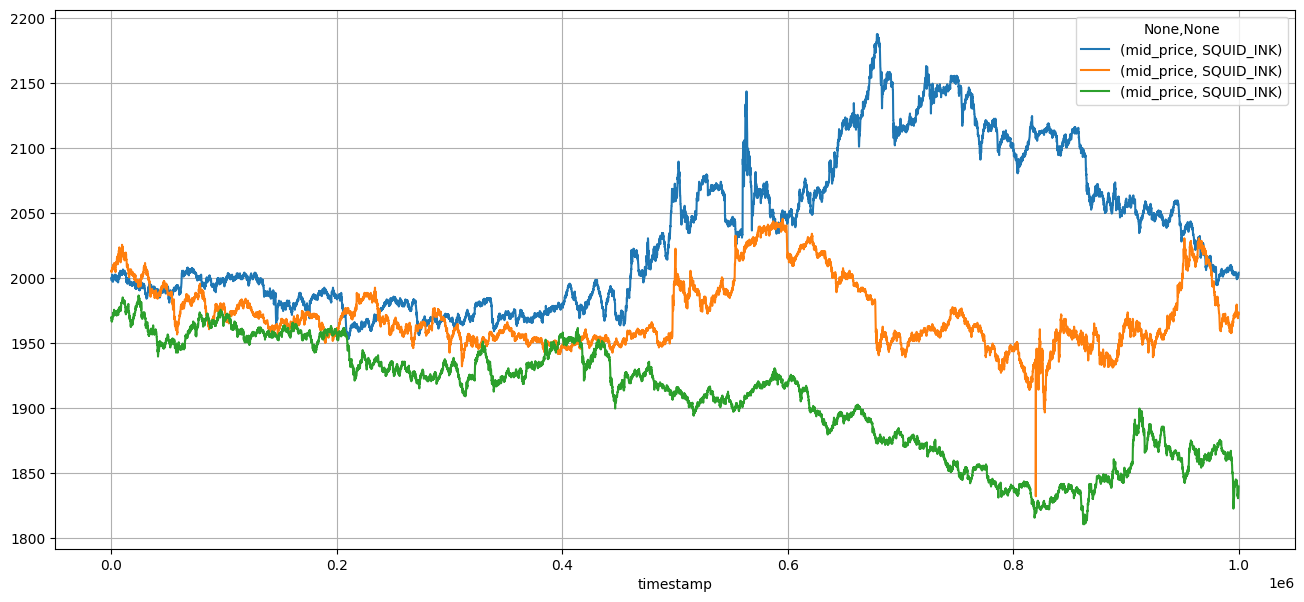

In [140]:
fig, ax = plt.subplots(figsize=(16,7))
squid_ink.plot(ax=ax)
ax.grid()
plt.show()

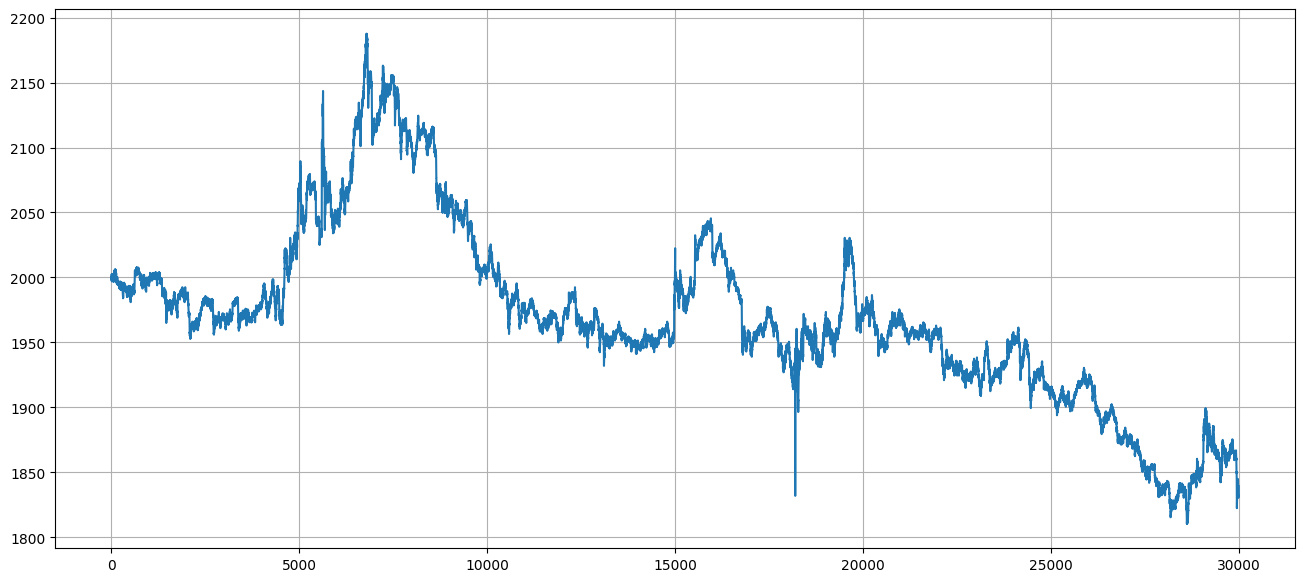

In [68]:
fig, ax = plt.subplots(figsize=(16,7))
squid_ink_all_days.plot(ax=ax)
ax.grid()
plt.show()

In [143]:
squid_ink_all_days

0        2000.000000
1        1999.304348
2        1998.967213
3        1998.500000
4        1998.000000
            ...     
29995    1831.500000
29996    1832.928571
29997    1833.500000
29998    1838.500000
29999    1839.500000
Length: 30000, dtype: float64

In [152]:
sq_history_day_minus_2 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_-2.csv', sep=';', header=0)
sq_history_day_minus_1 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_-1.csv', sep=';', header=0)
sq_history_day_minus_0 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/prices_round_1_day_0.csv', sep=';', header=0)

In [153]:
## Analyzing data bottles

sq_trade_history_day_minus_2 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/trades_round_1_day_-2.csv', sep=';', header=0)
#sq_trade_history_day_minus_2 = sq_trade_history_day_minus_2.pivot(columns=['symbol'], values=['price', 'quantity'])
sq_trade_history_day_minus_1 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/trades_round_1_day_-1.csv', sep=';', header=0)
#sq_trade_history_day_minus_1 = sq_trade_history_day_minus_1.pivot(columns=['symbol'], values=['price', 'quantity'])
sq_trade_history_day_minus_0 = pd.read_csv('../actual/round_1/round-1-island-data-bottle/trades_round_1_day_0.csv', sep=';', header=0)
#sq_trade_history_day_minus_0 = sq_trade_history_day_minus_0.pivot(columns=['symbol'], values=['price', 'quantity'])


C:\Users\Main_YnFb\AppData\Local\Temp\ipykernel_23076\368304607.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df['datetime'] = trades_df['timestamp']
C:\Users\Main_YnFb\AppData\Local\Temp\ipykernel_23076\368304607.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df['side'] = trades_df.apply(lambda row: determine_trade_side(row, orderbook_df), axis=1)


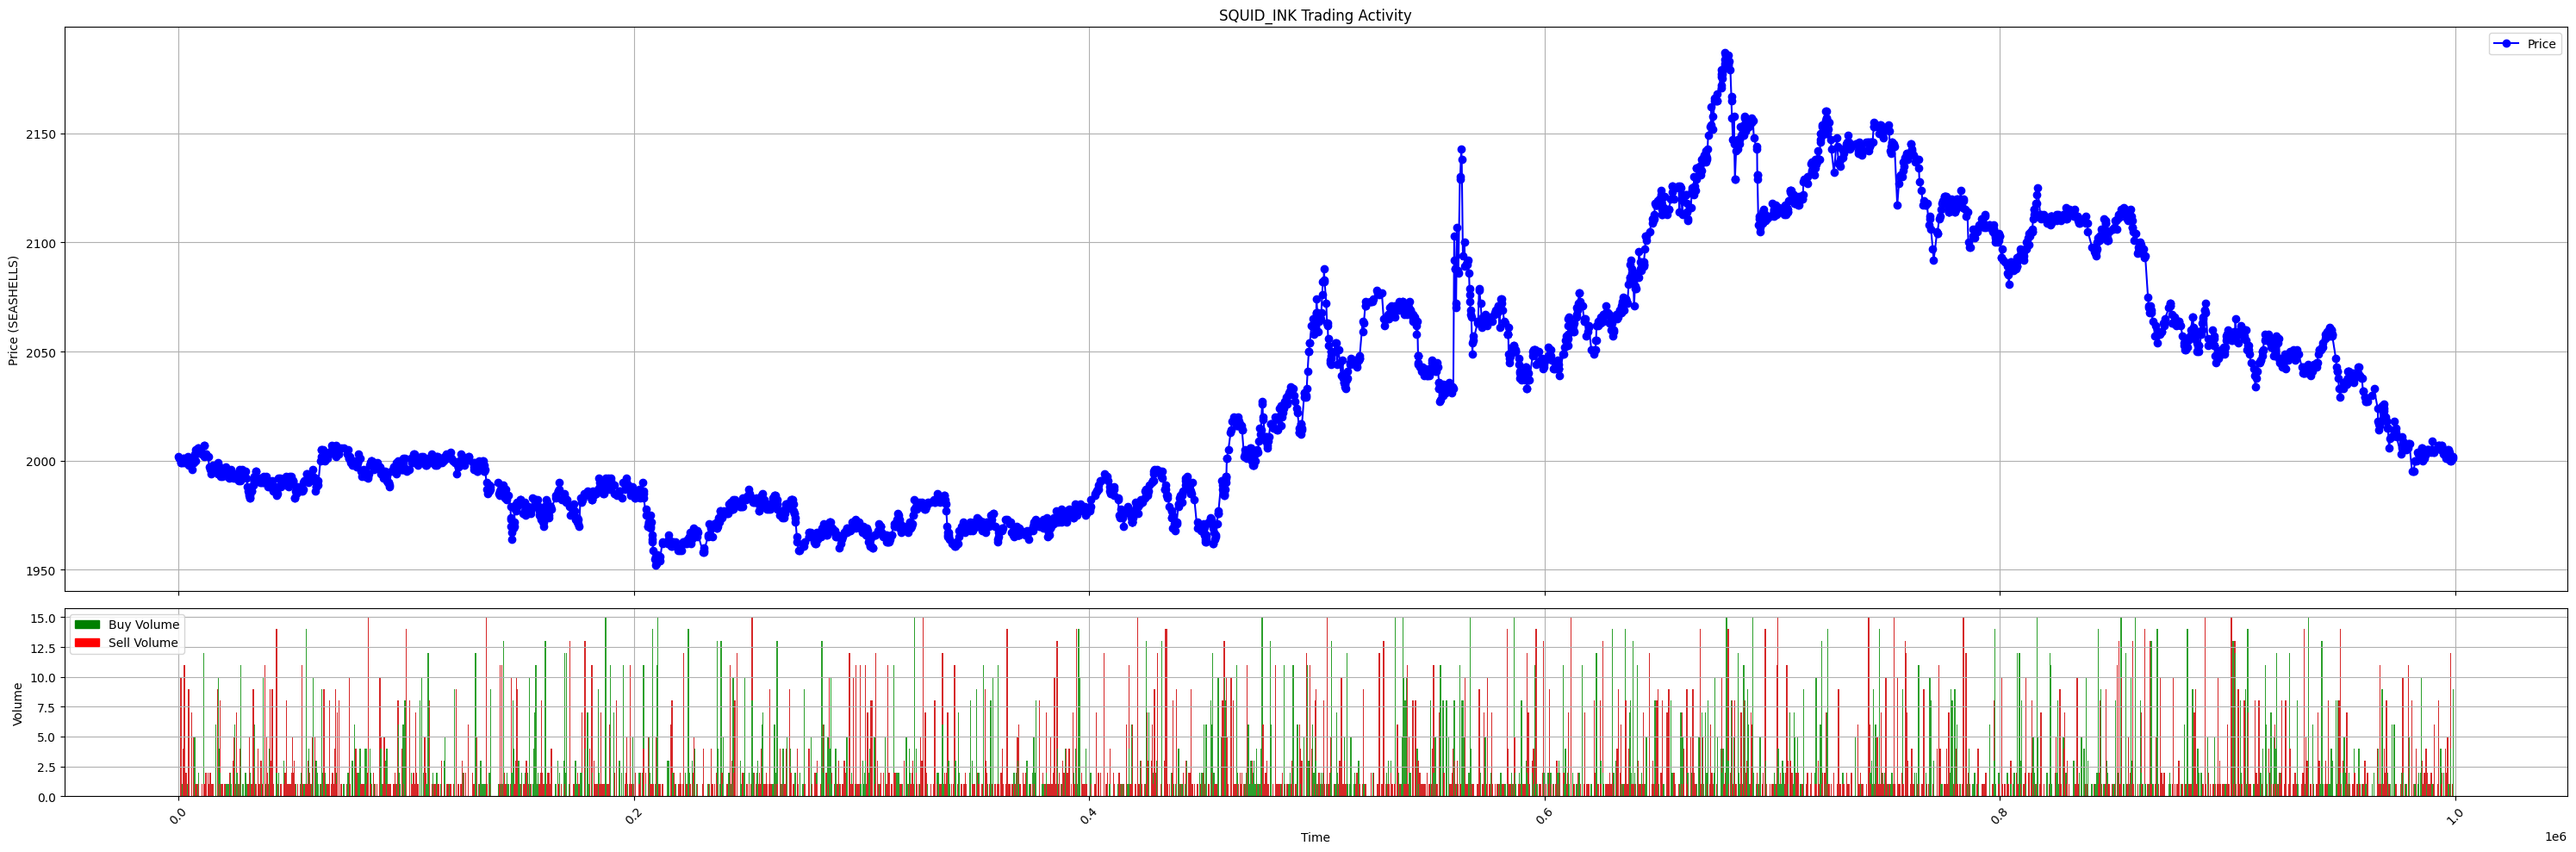

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Sample trade data
trades_df = sq_trade_history_day_minus_2
trades_df = trades_df[trades_df['symbol']=='SQUID_INK']

# Sample orderbook data
orderbook_df = sq_history_day_minus_2
orderbook_df = orderbook_df[orderbook_df['product']=='SQUID_INK']


# Convert timestamp to datetime for better visualization
start_time = datetime.now()
trades_df['datetime'] = trades_df['timestamp']

# Determine if trade is buy or sell by comparing with orderbook data
# For each trade, we'll determine if the trade price is closer to the ask (buy) or bid (sell)
def determine_trade_side(trade_row, orderbook_df):
    # Find the closest orderbook entry in time
    trade_time = trade_row['timestamp']
    orderbook_df['time_diff'] = abs(orderbook_df['timestamp'] - trade_time)
    closest_idx = orderbook_df['time_diff'].idxmin()
    closest_orderbook = orderbook_df.loc[closest_idx]
    
    # Compare trade price with bid and ask
    trade_price = trade_row['price']
    bid_price = closest_orderbook['bid_price_1']
    ask_price = closest_orderbook['ask_price_1']
    
    # If trade price is equal to or higher than ask price, it's likely a buy
    # If trade price is equal to or lower than bid price, it's likely a sell
    if trade_price >= ask_price:
        return 'buy'
    elif trade_price <= bid_price:
        return 'sell'
    else:
        # If it's in between, we'll compare distance to bid and ask
        if abs(trade_price - ask_price) <= abs(trade_price - bid_price):
            return 'buy'
        else:
            return 'sell'

# Apply the side determination to each trade
trades_df['side'] = trades_df.apply(lambda row: determine_trade_side(row, orderbook_df), axis=1)

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot price on top subplot
ax1.plot(trades_df['datetime'], trades_df['price'], 'b-', marker='o', label='Price')
ax1.set_title('SQUID_INK Trading Activity')
ax1.set_ylabel('Price (SEASHELLS)')
ax1.grid(True)
ax1.legend()

# Plot volume bars on bottom subplot with color based on trade side
colors = []
for i, row in trades_df.iterrows():
    if row['side'] == 'buy':
        colors.append('tab:green')
    else:
        colors.append('tab:red')
ax2.bar(trades_df['datetime'].values, trades_df['quantity'], color=colors, width=500)

ax2.set_ylabel('Volume')
ax2.grid(True)

# Create a custom legend for the volume subplot
import matplotlib.patches as mpatches
buy_patch = mpatches.Patch(color='green', label='Buy Volume')
sell_patch = mpatches.Patch(color='red', label='Sell Volume')
ax2.legend(handles=[buy_patch, sell_patch])

# Format x-axis to show time nicely
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

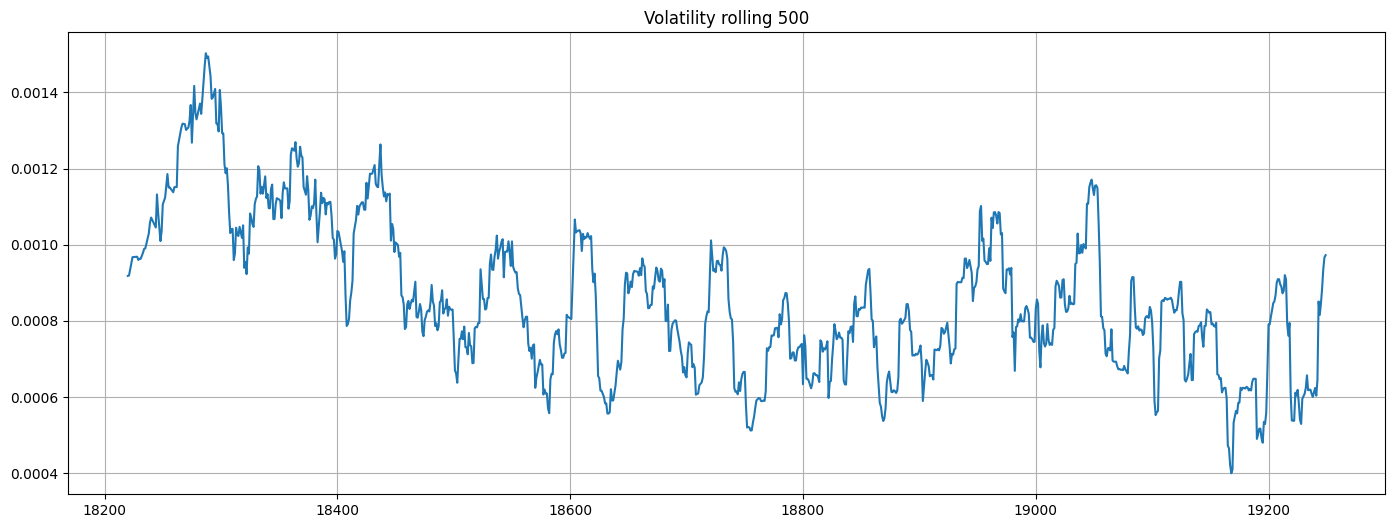

In [281]:
fig, ax = plt.subplots(figsize=(17,6))
squid_returns = squid_ink_all_days.pct_change()
#squid_ink_all_days.pct_change().rolling(20).std().plot(ax=ax)
squid_returns_clean = squid_returns[abs(squid_returns - squid_returns.mean())/squid_returns.std() < 3]
squid_returns_clean[18000:19000].rolling(20).std().plot(ax=ax)
ax.grid()
ax.set_title('Volatility rolling 500')
plt.show()

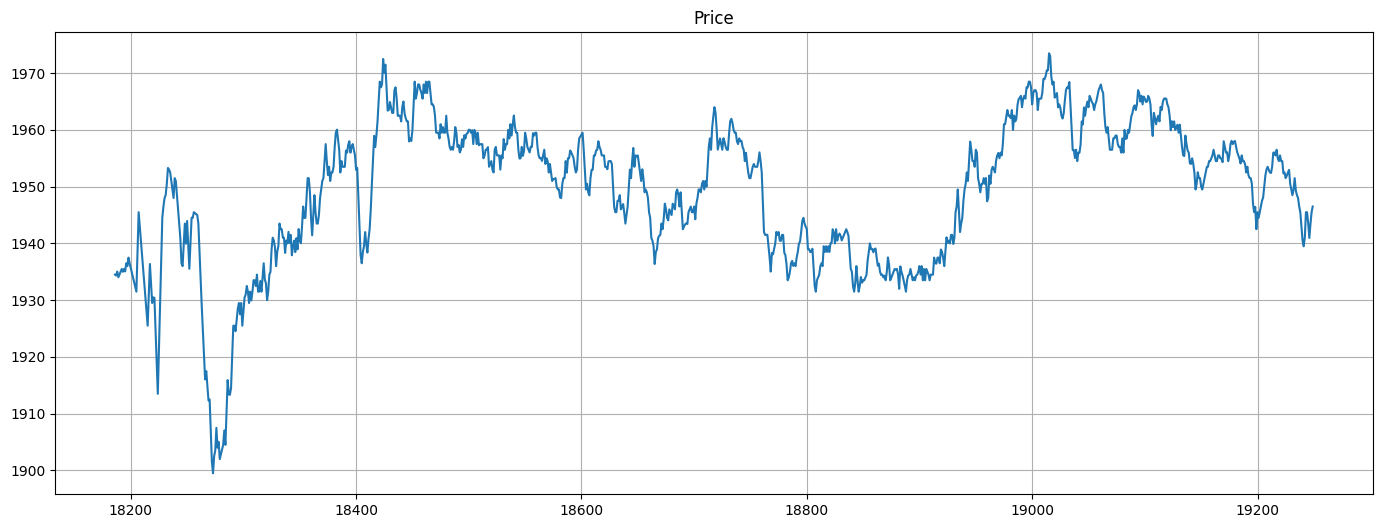

In [279]:
fig, ax = plt.subplots(figsize=(17,6))
squid_ink_all_days[abs(squid_returns - squid_returns.mean())/squid_returns.std() < 3][18000:19000].plot(ax=ax)
ax.grid()
ax.set_title('Price')
plt.show()

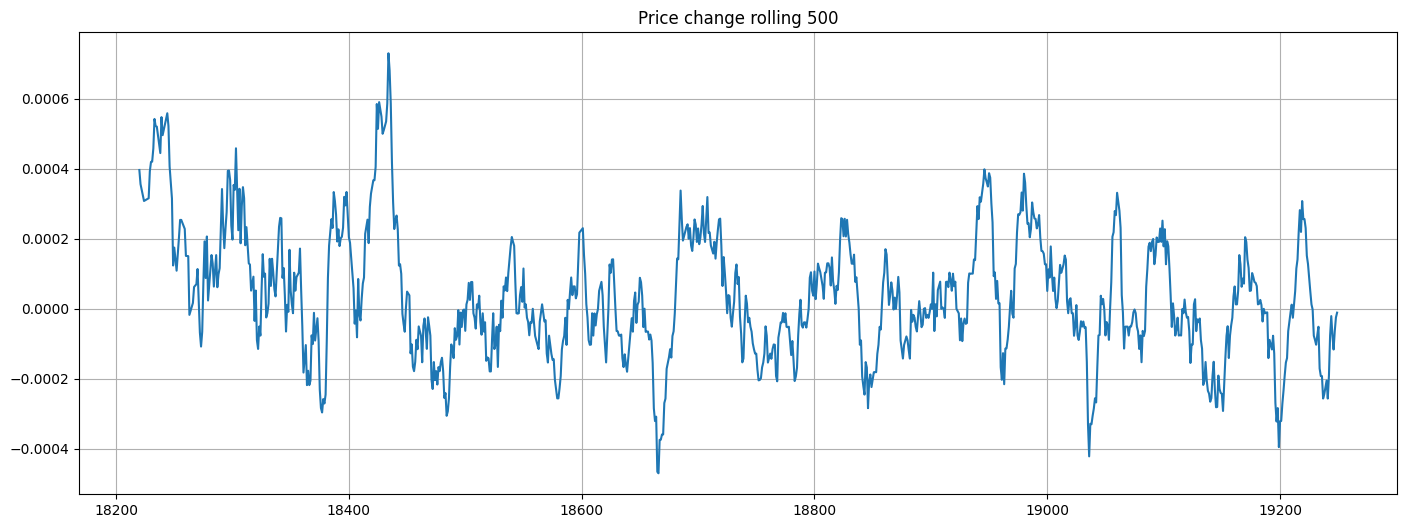

In [280]:
fig, ax = plt.subplots(figsize=(17,6))
squid_returns_clean[18000:19000].rolling(20).mean().plot(ax=ax)
ax.grid()
ax.set_title('Price change rolling 500')
plt.show()

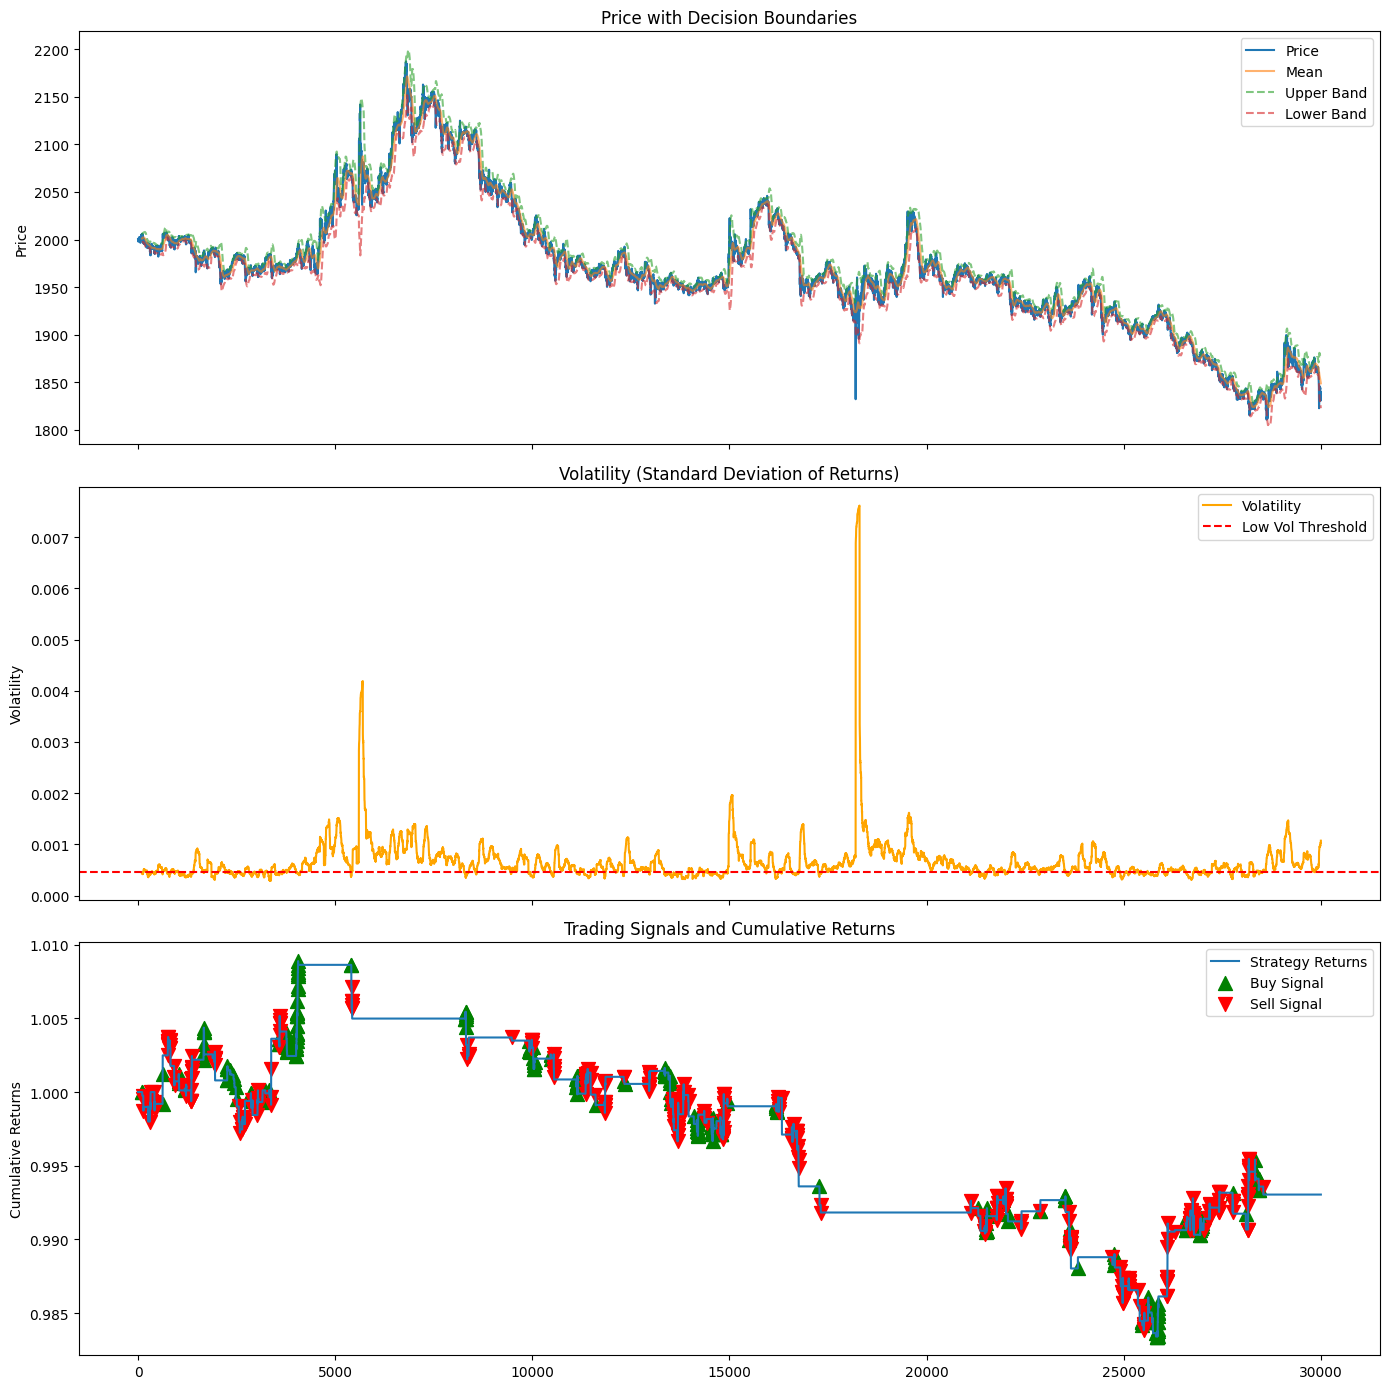

Total Return: -0.70%
Annualized Return: -0.01%
Sharpe Ratio: -0.05
Number of Buy Signals: 296
Number of Sell Signals: 413


In [249]:
df = pd.DataFrame({'timestamp':squid_ink_all_days.index, 'price':squid_ink_all_days.values})

# Function to implement volatility breakout strategy
def volatility_breakout_strategy(df, lookback_period=100, std_dev_threshold=2.0, 
                                volatility_percentile=25, holding_period=100):
    """
    Implements a volatility breakout strategy
    
    Parameters:
    -----------
    df : DataFrame with price data
    lookback_period : Period for calculating rolling statistics
    std_dev_threshold : Number of standard deviations for breakout detection
    volatility_percentile : Percentile threshold to identify low volatility periods
    holding_period : Number of periods to hold a position after entry
    
    Returns:
    --------
    DataFrame with signals and performance metrics
    """
    # Copy the dataframe to avoid modifying the original
    data = df.copy()
    
    # Calculate returns
    data['returns'] = data['price'].pct_change()
    
    # Calculate rolling statistics
    data['rolling_mean'] = data['price'].rolling(window=lookback_period).mean()
    data['rolling_std'] = data['price'].rolling(window=lookback_period).std()
    
    # Calculate volatility (standard deviation of returns)
    data['volatility'] = data['returns'].rolling(window=lookback_period).std()
    
    # Calculate upper and lower bands
    data['upper_band'] = data['rolling_mean'] + std_dev_threshold * data['rolling_std']
    data['lower_band'] = data['rolling_mean'] - std_dev_threshold * data['rolling_std']
    
    # Identify low volatility periods
    # First, get the percentile threshold value
    vol_threshold = data['volatility'].quantile(volatility_percentile/100)
    data['low_volatility'] = data['volatility'] <= vol_threshold
    
    # Initialize signal column
    data['signal'] = 0
    
    # Generate signals
    for i in range(lookback_period + 1, len(data)):
        # Check if we're in a low volatility period and not already in a position
        if data['low_volatility'].iloc[i-1] and data['signal'].iloc[i-1] == 0:
            # Breakout above upper band - buy signal
            if data['price'].iloc[i] > data['upper_band'].iloc[i-1]:
                data.loc[data.index[i], 'signal'] = 1
            # Breakout below lower band - sell signal
            elif data['price'].iloc[i] < data['lower_band'].iloc[i-1]:
                data.loc[data.index[i], 'signal'] = -1
        
        # Exit positions after holding period
        if abs(data['signal'].iloc[i-holding_period]) == 1:
            data.loc[data.index[i], 'signal'] = 0
    
    # Calculate strategy returns
    data['strategy_returns'] = data['signal'].shift(1) * data['returns']
    data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()
    
    return data

# Apply the strategy
results = volatility_breakout_strategy(df)

# Visualize the results
def plot_strategy_results(results):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 14), sharex=True)
    
    # Plot price and bands
    ax1.plot(results['timestamp'], results['price'], label='Price')
    ax1.plot(results['timestamp'], results['rolling_mean'], label='Mean', alpha=0.6)
    ax1.plot(results['timestamp'], results['upper_band'], label='Upper Band', linestyle='--', alpha=0.6)
    ax1.plot(results['timestamp'], results['lower_band'], label='Lower Band', linestyle='--', alpha=0.6)
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.set_title('Price with Decision Boundaries')
    
    # Plot volatility
    ax2.plot(results['timestamp'], results['volatility'], label='Volatility', color='orange')
    ax2.axhline(y=results['volatility'].quantile(0.25), color='r', linestyle='--', label='Low Vol Threshold')
    ax2.set_ylabel('Volatility')
    ax2.legend()
    ax2.set_title('Volatility (Standard Deviation of Returns)')
    
    # Plot signals and cumulative returns
    buy_signals = results[results['signal'] == 1]
    sell_signals = results[results['signal'] == -1]
    ax3.plot(results['timestamp'], results['cumulative_returns'], label='Strategy Returns')
    ax3.scatter(buy_signals['timestamp'], buy_signals['cumulative_returns'], 
               color='green', marker='^', s=100, label='Buy Signal')
    ax3.scatter(sell_signals['timestamp'], sell_signals['cumulative_returns'], 
               color='red', marker='v', s=100, label='Sell Signal')
    ax3.set_ylabel('Cumulative Returns')
    ax3.legend()
    ax3.set_title('Trading Signals and Cumulative Returns')
    
    plt.tight_layout()
    plt.show()

# Analyze performance
def analyze_performance(results):
    """Calculate basic performance metrics"""
    # Clean the data to remove NaN values
    clean_results = results.dropna()
    
    # Calculate metrics
    total_return = clean_results['cumulative_returns'].iloc[-1] - 1
    annualized_return = (1 + total_return) ** (252 / len(clean_results)) - 1
    sharpe_ratio = np.sqrt(252) * clean_results['strategy_returns'].mean() / clean_results['strategy_returns'].std()
    
    # Count signals
    buy_signals = sum(results['signal'] == 1)
    sell_signals = sum(results['signal'] == -1)
    
    print(f"Total Return: {total_return:.2%}")
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Number of Buy Signals: {buy_signals}")
    print(f"Number of Sell Signals: {sell_signals}")

# Visualize and analyze
plot_strategy_results(results)
analyze_performance(results)

# To adapt this to your actual data:
# 1. Replace the sample data generation with your data loading
# 2. Adjust the parameters (lookback_period, std_dev_threshold, volatility_percentile, holding_period)
# 3. Add additional risk management as needed

In [242]:
df

0        2000.000000
1        1999.304348
2        1998.967213
3        1998.500000
4        1998.000000
            ...     
29995    1831.500000
29996    1832.928571
29997    1833.500000
29998    1838.500000
29999    1839.500000
Name: price, Length: 30000, dtype: float64